In [1]:
import json
from datetime import datetime
from dateutil import tz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn


In [2]:
with open('../newest_ts', 'r') as f:
    ts = f.read()

data_path = f"../data/data_{ts}.json"
with open(data_path, 'r') as f:
    data = json.load(f)

In [3]:
def ts2dt(ts, format='%Y-%m-%d %H:%M:%S'):
    return (datetime.utcfromtimestamp(int(ts))
                    .replace(tzinfo=tz.tzutc())
                    .astimezone(tz.tzlocal())
                    .strftime(format))

print(f"Recent query happens at {ts2dt(ts)}")

Recent query happens at 2021-08-23 02:24:32


In [4]:
data.keys()

dict_keys(['lat', 'lon', 'timezone', 'timezone_offset', 'current', 'hourly', 'daily'])

In [5]:
data['current']

{'dt': 1629685472,
 'sunrise': 1629669780,
 'sunset': 1629715720,
 'temp': 31.22,
 'feels_like': 38.22,
 'pressure': 1008,
 'humidity': 77,
 'dew_point': 26.7,
 'uvi': 7.5,
 'clouds': 27,
 'visibility': 10000,
 'wind_speed': 3.2,
 'wind_deg': 222,
 'wind_gust': 4.15,
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}]}

In [6]:
data['hourly'][0]

{'dt': 1629684000,
 'temp': 31.22,
 'feels_like': 38.22,
 'pressure': 1008,
 'humidity': 77,
 'dew_point': 26.7,
 'uvi': 7.5,
 'clouds': 27,
 'visibility': 10000,
 'wind_speed': 3.2,
 'wind_deg': 222,
 'wind_gust': 4.15,
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'pop': 0.54}

In [7]:
df_hourly = pd.DataFrame(data['hourly'])
df_daily = pd.DataFrame(data['daily'])

In [8]:
df_hourly.head()

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather,pop,rain
0,1629684000,31.22,38.22,1008,77,26.70,7.50,27,10000,3.20,222,4.15,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.54,NaN
1,1629687600,31.03,38.03,1008,75,26.07,10.47,27,10000,3.79,218,4.50,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.50,NaN
2,1629691200,30.94,37.94,1008,73,25.53,12.06,27,10000,4.66,219,4.81,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.49,NaN
3,1629694800,30.79,37.63,1007,72,25.15,11.88,35,10000,4.48,219,4.48,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0.41,{'1h': 0.21}
4,1629698400,30.61,36.29,1007,69,24.27,9.88,46,10000,4.33,207,4.33,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0.46,{'1h': 0.27}


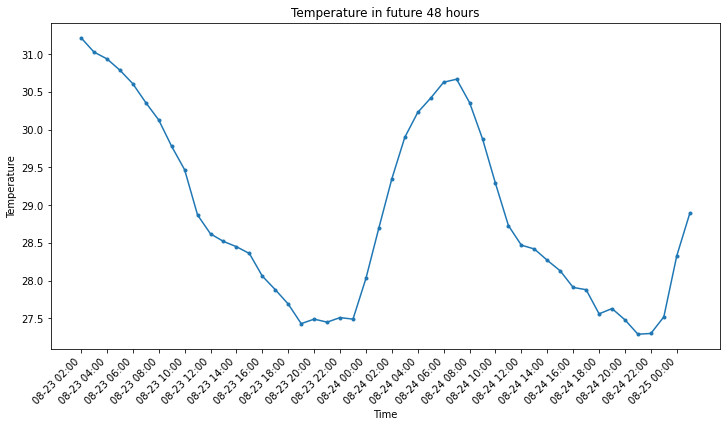

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df_hourly.temp, '.-')
ax.set(title='Temperature in future 48 hours', xlabel='Time', ylabel='Temperature')
ax.set_xticks(list(range(0, len(df_hourly), 2)))
ax.set_xticklabels([ts2dt(ts, '%m-%d %H:%M') for i, ts in enumerate(df_hourly.dt) if i%2==0], 
                   rotation=45, ha="right")
plt.show()